(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)


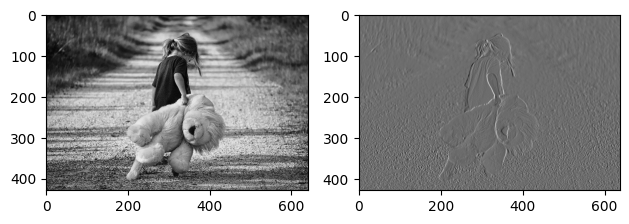

In [1]:
# 원본 이미지에 대해 convolution연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요!

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 그림을 두개 그려야 해요!
# 왼쪽 그림은 원본 이미지를 출력할 꺼구요!
# 오른쪽 그림은 원본에서 특징을 추출한 feature map을 출력할 꺼예요!
fig = plt.figure()

img_ori = fig.add_subplot(1,2,1)
img_feature = fig.add_subplot(1,2,2)

origin_img = img.imread('girl-teddy.jpg')
img_ori.imshow(origin_img)

print(origin_img.shape)
# 원본 이미지의 shape => (429, 640, 3)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 이용하려는 API(Convolution연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1, 429, 640, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
print(input_image.shape)  # (1, 429, 640, 3)
# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# 입력이미지의 형태(shape) => (1, 429, 640, 3)
# 입력이미지의 channel을 변경해서 입력이미지의 형태를
# (1, 429, 640, 1) 이 형태로 변환할 꺼예요!
channel_1_input_image = input_image[:,:,:,0:1]
print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter를 준비해야 해요!
# (3,3,1,1) => (filter의 hieght, filter의 width,
              # filter의 channel, filter의 개수)
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
print(filter.shape)  # (3, 3, 1, 1)

# strides => 1로 설정
# padding은 사용하지 않습니다.(VALID)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')

conv2d_result = conv2d.numpy()

# feature map의 shape을 알아보아요!
print(conv2d_result.shape)  # (1, 427, 638, 1)

t_img = conv2d_result[0,:,:,:]

img_feature.imshow(t_img, cmap='gray')

plt.tight_layout()
plt.show()

(376, 602, 3)
(1, 376, 602, 3)
(3, 3, 3, 1)
(1, 374, 600, 1)


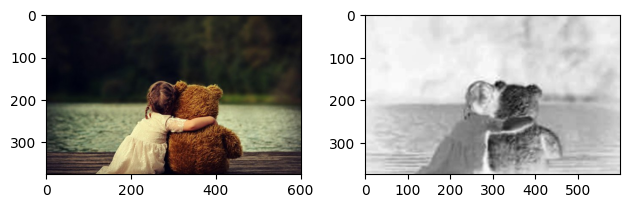

In [2]:
# 원본 이미지(컬러이미지)에 대해 convolution연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요!

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 그림을 두개 그려야 해요!
# 왼쪽 그림은 원본 이미지를 출력할 꺼구요!
# 오른쪽 그림은 원본에서 특징을 추출한 feature map을 출력할 꺼예요!
fig = plt.figure()

img_ori = fig.add_subplot(1,2,1)
img_feature = fig.add_subplot(1,2,2)

origin_img = img.imread('girl-teddy-color.jpg')
img_ori.imshow(origin_img)

print(origin_img.shape)
# 원본 이미지의 shape => (376, 602, 3)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 이용하려는 API(Convolution연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1, 376, 602, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
print(input_image.shape)  # (1, 376, 602, 3)
# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# filter를 준비해야 해요!
# (3,3,3,1) => (filter의 hieght, filter의 width,
              # filter의 channel, filter의 개수)
filter = np.array([[[[-1], [0], [1]], [[-1], [0], [1]], [[-1], [0], [1]]],
                   [[[-1], [0], [1]], [[-1], [0], [1]], [[-1], [0], [1]]],
                   [[[-1], [0], [1]], [[-1], [0], [1]], [[-1], [0], [1]]]])
print(filter.shape)  # (3, 3, 3, 1)

# strides => 1로 설정
# padding은 사용하지 않습니다.(VALID)

conv2d = tf.nn.conv2d(input_image,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')

conv2d_result = conv2d.numpy()

# # feature map의 shape을 알아보아요!
print(conv2d_result.shape)  #

t_img = conv2d_result[0,:,:,:]

img_feature.imshow(t_img, cmap='gray')

plt.tight_layout()
plt.show()

(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)


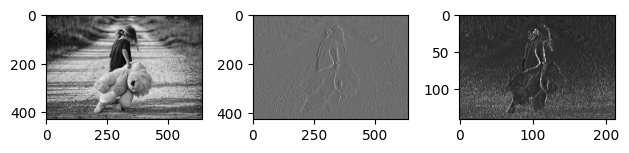

In [3]:
# 원본 이미지에 대해 convolution연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요!
# 흑백이미지를 가지고 1 channel을 사용해서 convolution 연산과
# pooling  연산을 수행해 보아요!


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 그림을 세개 그려야 해요!
# 맨 왼쪽 그림은 원본 이미지를 출력할 꺼구요!
# 가운데 그림은 원본에서 특징을 추출한 feature map을 출력할 꺼예요!
# 맨 오른쪽 그림은 feature map에 pooling처리를 한 결과를 출력!!
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

origin_img = img.imread('girl-teddy.jpg')
ax1.imshow(origin_img)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 이용하려는 API(Convolution연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1, 429, 640, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
print(input_image.shape)  # (1, 429, 640, 3)
# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# 입력이미지의 형태(shape) => (1, 429, 640, 3)
# 입력이미지의 channel을 변경해서 입력이미지의 형태를
# (1, 429, 640, 1) 이 형태로 변환할 꺼예요!
channel_1_input_image = input_image[:,:,:,0:1]
print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter를 준비해야 해요!
# (3,3,1,1) => (filter의 hieght, filter의 width,
              # filter의 channel, filter의 개수)
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
print(filter.shape)  # (3, 3, 1, 1)

# strides => 1로 설정
# padding은 사용하지 않습니다.(VALID)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')

conv2d_result = conv2d.numpy()

# feature map의 shape을 알아보아요!
print(conv2d_result.shape)  # (1, 427, 638, 1)

t_img = conv2d_result[0,:,:,:]

ax2.imshow(t_img, cmap='gray')

# 추가적으로 pooling처리 하기
# pooling은 kernel의 크기만 우리가 설정하면 됨
# 자동적으로 strides는 kernel크기에 따라 설정
# 사용하는 kernel 크기는 3 * 3으로 함

pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1],
                      padding='VALID')
pool_result = pool.numpy()
p_img = pool_result[0,:,:,:]
ax3.imshow(p_img,cmap='gray')

plt.tight_layout()
plt.show()

(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)


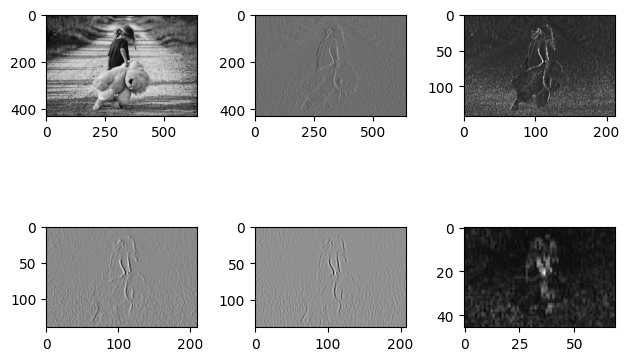

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 그림을 세개 그려야 해요!
# 맨 왼쪽 그림은 원본 이미지를 출력할 꺼구요!
# 가운데 그림은 원본에서 특징을 추출한 feature map을 출력할 꺼예요!
# 맨 오른쪽 그림은 feature map에 pooling처리를 한 결과를 출력!!
fig = plt.figure()

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

origin_img = img.imread('girl-teddy.jpg')
ax1.imshow(origin_img)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 이용하려는 API(Convolution연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1, 429, 640, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
print(input_image.shape)  # (1, 429, 640, 3)
# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# 입력이미지의 형태(shape) => (1, 429, 640, 3)
# 입력이미지의 channel을 변경해서 입력이미지의 형태를
# (1, 429, 640, 1) 이 형태로 변환할 꺼예요!
channel_1_input_image = input_image[:,:,:,0:1]
print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter를 준비해야 해요!
# (3,3,1,1) => (filter의 hieght, filter의 width,
              # filter의 channel, filter의 개수)
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
print(filter.shape)  # (3, 3, 1, 1)

# strides => 1로 설정
# padding은 사용하지 않습니다.(VALID)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')

conv2d_result = conv2d.numpy()

# feature map의 shape을 알아보아요!
print(conv2d_result.shape)  # (1, 427, 638, 1)

t_img = conv2d_result[0,:,:,:]

ax2.imshow(t_img, cmap='gray')

# 추가적으로 pooling처리 하기
# pooling은 kernel의 크기만 우리가 설정하면 됨
# 자동적으로 strides는 kernel크기에 따라 설정
# 사용하는 kernel 크기는 3 * 3으로 함

pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1],
                      padding='VALID')

pool_result = pool.numpy()
p_img = pool_result[0,:,:,:]
ax3.imshow(p_img,cmap='gray')

conv2d = tf.nn.conv2d(pool_result,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')
conv2d_result = conv2d.numpy()

t_img = conv2d_result[0,:,:,:]
ax4.imshow(t_img,cmap='gray')

conv2d = tf.nn.conv2d(conv2d_result,
                      filter,
                      strides=[1,1,1,1,],
                      padding='VALID')

conv2d_result = conv2d.numpy()
t_img = conv2d_result[0,:,:,:]
ax5.imshow(t_img,cmap='gray')

pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1],
                      padding='VALID')

pool_result = pool.numpy()

p_img = pool_result[0,:,:,:]

ax6.imshow(p_img, cmap='gray')


plt.tight_layout()
plt.show()

In [5]:
# CNN 구현
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv('C:/Users/user/Desktop/my_ws/edu/deeplearning/23_12_13/train.csv')

x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

x_data_norm_train , x_data_norm_test, t_data_train, t_data_test =\
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)
model = Sequential()
model.add(Conv2D(filters = 32,
                kernel_size = (3,3),
                strides = (1,1),
                activation = 'relu',
                input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters =64,
                 kernel_size= (3,3),
                 strides = (1,1),
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters =128,
                 kernel_size= (3,3),
                 strides = (1,1),
                 activation = 'relu'))
model.add(Flatten())

model.add(Dense(units=256,
                activation = 'relu'))
model.add(Dense(units=10,
                activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [7]:
import tensorflow as tf 
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices() )


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18029027773900816447
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3665166336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9420867471765680624
physical_device_desc: "device: 0, name: GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [8]:
history = model.fit(x_data_norm_train.reshape(-1,28,28,1),
                    t_data_train,
                    epochs = 100,
                    batch_size = 100,
                    validation_split = 0.3,
                    verbose = 1)


Epoch 1/100
206/206 [==============================] - 4s 8ms/step - loss: 0.3387 - acc: 0.8946 - val_loss: 0.1659 - val_acc: 0.9456
Epoch 2/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0817 - acc: 0.9750 - val_loss: 0.0655 - val_acc: 0.9810
Epoch 3/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0518 - acc: 0.9837 - val_loss: 0.0663 - val_acc: 0.9781
Epoch 4/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0401 - acc: 0.9869 - val_loss: 0.0557 - val_acc: 0.9825
Epoch 5/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0304 - acc: 0.9908 - val_loss: 0.0519 - val_acc: 0.9847
Epoch 6/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0246 - acc: 0.9923 - val_loss: 0.0516 - val_acc: 0.9836
Epoch 7/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0189 - acc: 0.9937 - val_loss: 0.0431 - val_acc: 0.9866
Epoch 8/100
206/206 [==============================] - 1s 6ms/step - 

394/394 [==============================] - 1s 2ms/step - loss: 0.1174 - acc: 0.9890
[0.11740992218255997, 0.9889682531356812]


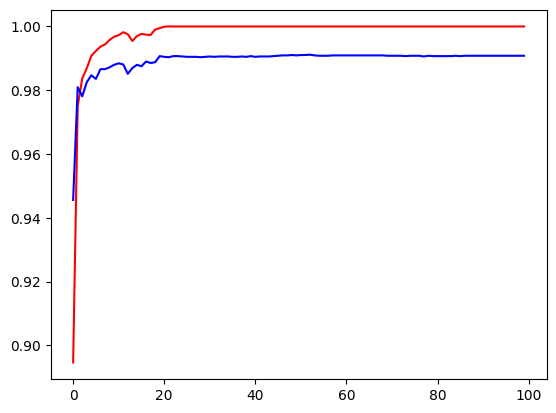

In [9]:
print(model.evaluate(x_data_norm_test.reshape(-1,28,28,1),t_data_test))

import matplotlib.pyplot as plt

plt.plot(history.history['acc'],color ='r')
plt.plot(history.history['val_acc'],color = 'b')
plt.show()

In [10]:
import numpy
import tensorflow as tf

print(f'tf.__version__: {tf.__version__}')

gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.list_physical_devices('GPU') 이 코드도 가능
for gpu in gpus:
    print(gpu)

tf.__version__: 2.6.0
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [11]:
tf.test.is_built_with_cuda()

True

In [12]:
tf.test.is_built_with_gpu_support()

True

In [13]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [14]:
import tensorflow as tf

print(tf.__version__) # 텐서플로우 버전 확인

tf.test.is_built_with_cuda() # cuda 잘 작동되는지

tf.test.is_built_with_gpu_support() # gpu support 되는지 확인

tf.test.gpu_device_name() # gpu 장치 이름들

2.6.0


'/device:GPU:0'